 # Tensorflow API / Model Installation

## Tensorflow GPU

__Prerequisites__: [Nvidia](https://developer.nvidia.com/rdp/cudnn-download)
- Nvidia GPU (GTX 650 or newer)
- CUDA Toolkit v9.0
- CuDNN v7.0.5
- Anaconda with Python 3.7

__Pip installation__:
pip install --ignore-installed --upgrade tensorflow-gpu

In [1]:
import tensorflow as tf
print(tf.__version__)

1.13.1



Download or clone the Tensorflow Object Detection repository: [Tensorflow Object Detection](https://github.com/tensorflow/models)


Download or clone the repository with the models (must match the installed version of tf)): [Modelos TF](https://github.com/tensorflow/models/tree/r1.13.0)

Download Model Faster-RCNN-Inception-V2 pre-trained: [Modelo](http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz)

## Create Anaconda Environment

### Libraries Needed

In [ ]:
C:\> conda create -n tensorflow1 pip python=3.5
C:\> activate tensorflow1
(tensorflow1) C:\>python -m pip install --upgrade pip
(tensorflow1) C:\> pip install --ignore-installed --upgrade tensorflow-gpu
(tensorflow1) C:\> conda install -c anaconda protobuf
(tensorflow1) C:\> pip install pillow
(tensorflow1) C:\> pip install lxml
(tensorflow1) C:\> pip install Cython
(tensorflow1) C:\> pip install contextlib2
(tensorflow1) C:\> pip install jupyter
(tensorflow1) C:\> pip install matplotlib
(tensorflow1) C:\> pip install pandas
(tensorflow1) C:\> pip install opencv-python

### Environment variables

### Compile

### Install

# DataSet


We will use the dataset that we can find here: [GTSDB](http://benchmark.ini.rub.de/?section=gtsdb&subsection=dataset) corresponding to German traffic signals.
We will find images in .ppm format with dimensions of 16x16 to 128x128.
Also for the treatment of these images we will use a csv file where we will have the information of where the signals are in the image.

In [2]:
import os
import pickle
import csv
from PIL import Image
import math
import matplotlib.pyplot as plt
import random
import cv2
import numpy as np

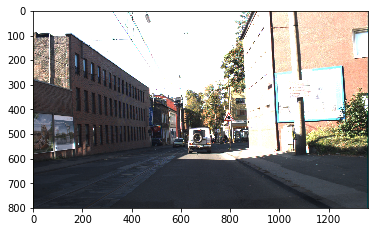

In [5]:
img = cv2.imread('C:/Users/Usuario/Desktop/Pruebas/train/00000.ppm')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
f = open ('C:/Users/Usuario/Desktop/Pruebas/train/gt.txt','r')
mensaje = f.readlines()
msg = mensaje[0].split(';')
print(msg)
f.close()
#Name#leftmost image column of the ROI#upmost image row of the ROI#rightmost image column of the ROI#downmost image row of the ROI
name = msg[0]
leftmostcolumn = msg[1]
upmostrow = msg[2]
rightmostcolumn = msg[3]
downmostrow = msg[4]
print(name)
print(leftmostcolumn)
print(upmostrow)
print(rightmostcolumn)
print(downmostrow)

['00000.ppm', '774', '411', '815', '446', '11\n']
00000.ppm
774
411
815
446


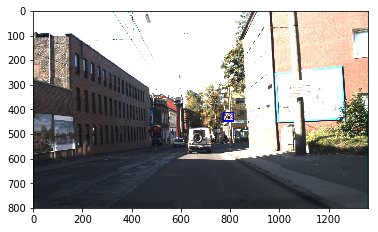

In [15]:
img = cv2.rectangle(img,(774,411),(815,446),(255,0,0),3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Label Images

It is necessary to label the images with the coordinates of the objects in this case the signals, for this we will use the file with the auxiliary dataset data and transform it into an xml for each image where we will have the coordinates of the object.

In [ ]:
import cv2
from pathlib import Path
import xml.etree.cElementTree as ET

d1 = 'C:/Users/Usuario/Desktop/Pruebas/train/'
d2 = 'C:/tensorflow1/models/research/object_detection/images/train/' 
data_folder = Path("C:/tensorflow1/models/research/object_detection/images/train/")

with open("C:/Users/Usuario/Desktop/Pruebas/FullIJCNN2013/gt.txt", "r") as f:
    data = f.readlines()
    for line in data:
        words = line.split()
        wd = words[0].split(";")
        name = wd[0].split(".")[0]+".jpg"
        print (name)
        imf = cv2.imread(d2+name)
        height, width, _ = np.array(imf).shape
        file_to_open = data_folder / name
        xmin = wd[1]
        ymin = wd[2]
        xmax = wd[3]
        ymax = wd[4]
        xml1 = "images/train/"+name.split(".")[0]+".xml"
        print(xml1)
        annotation = ET.Element("annotation")
        folder = ET.SubElement(annotation, "folder").text="train"
        filename = ET.SubElement(annotation, "filename").text=str(name)
        path = ET.SubElement(annotation, "path").text=str(file_to_open)
        source = ET.SubElement(annotation, "source")
        ET.SubElement(source, "database").text = "Unknown"
        size = ET.SubElement(annotation, "size")
        ET.SubElement(size, "width").text = str(width)
        ET.SubElement(size, "height").text = str(height)
        ET.SubElement(size, "depth").text = "3"
        segmented = ET.SubElement(annotation, "segmented").text="0"
        object = ET.SubElement(annotation, "object")
        ET.SubElement(object, "name").text = "sign"
        ET.SubElement(object, "pose").text = "Unspecified"
        ET.SubElement(object, "truncated").text = "0"
        ET.SubElement(object, "difficult").text = "0"
        bndbox = ET.SubElement(object, "bndbox")
        ET.SubElement(bndbox, "xmin").text = str(xmin)
        ET.SubElement(bndbox, "ymin").text = str(ymin)
        ET.SubElement(bndbox, "xmax").text = str(xmax)
        ET.SubElement(bndbox, "ymax").text = str(ymax)
        tree = ET.ElementTree(annotation)
        tree.write(xml1)
      

In [2]:
import xml.dom.minidom

dom = xml.dom.minidom.parse('C:/tensorflow1/models/research/object_detection/images/train/00200.xml')
pretty_xml_as_string = dom.toprettyxml()

print(pretty_xml_as_string)

<?xml version="1.0" ?>
<annotation>
	<folder>train</folder>
	<filename>00200.jpg</filename>
	<path>C:\tensorflow1\models\research\object_detection\images\train\00200.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>1360</width>
		<height>800</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>sign</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>257</xmin>
			<ymin>403</ymin>
			<xmax>281</xmax>
			<ymax>428</ymax>
		</bndbox>
	</object>
</annotation>



# Configure Api with our data


We transform the xml to csv


We configure the generate_tfrecord.py file with the classes of our dataset, in this case we will only have one

In [ ]:
def class_text_to_int(row_label):
    if row_label == 'sign':
        return 1
    else:
        None

We must also create a labelmap.pbtxt file with the tag map, only one, in this case the signal.

In [ ]:
item {
  id: 1
  name: 'sign'
}

Finally we just have to configure the model for training, faster_rcnn_inception_v2_pets.config


- Line 9. num_classes: 1
- Line 106. fine_tune_checkpoint: "C:/tensorflow1/models/research/object_detection/faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt"
- Line 123. input_path: "C:/tensorflow1/models/research/object_detection/train.record"
- Line 125. label_map_path: "C:/tensorflow1/models/research/object_detection/training/label_map.pbtxt"
- Line 130. num_examples: 200
- Line 135. input_path: "C:/tensorflow1/models/research/object_detection/test.record"
- Line 137. label_map_path: "C:/tensorflow1/models/research/object_detection/training/label_map.pbtxt"

# Training

# Check results

In [4]:
import sys
import cv2
import csv
import pickle
import numpy as np
import struct ## new
import zlib
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from utils import label_map_util
from utils import visualization_utils as vis_util

In [2]:
MODEL_NAME = 'inference_graph'
CWD_PATH = os.getcwd()
PATH_TO_CKPT = os.path.join(CWD_PATH,MODEL_NAME,'frozen_inference_graph.pb')
PATH_TO_LABELS = os.path.join(CWD_PATH,'training','label_map.pbtxt')
NUM_CLASSES = 1
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)

image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
num_detections = detection_graph.get_tensor_by_name('num_detections:0')

W0725 17:07:23.946246 12640 deprecation_wrapper.py:119] From C:\tensorflow1\models\research\object_detection\utils\label_map_util.py:132: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.



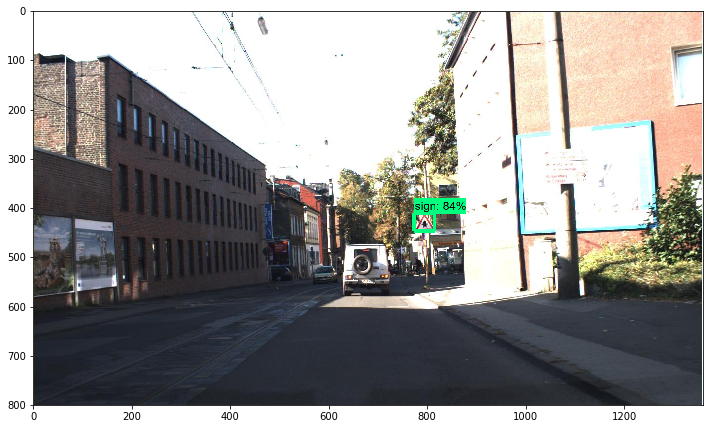

In [10]:
image = cv2.imread('C:/tensorflow1/models/research/object_detection/images/test/00000.jpg')
image_expanded = np.expand_dims(image, axis=0)

(boxes, scores, classes, num) = sess.run(
    [detection_boxes, detection_scores, detection_classes, num_detections],
    feed_dict={image_tensor: image_expanded})


vis_util.visualize_boxes_and_labels_on_image_array(
    image,
    np.squeeze(boxes),
    np.squeeze(classes).astype(np.int32),
    np.squeeze(scores),
    category_index,
    use_normalized_coordinates=True,
    line_thickness=8,
    min_score_thresh=0.60)

IMAGE_SIZE=(12,8)
plt.figure(figsize=IMAGE_SIZE)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()